In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from helpers import (readMaster, baskod2010tobasomrade, byGender, appendNewDatapoints, plotcombined)

Read data

In [3]:
master = readMaster()

In [22]:
df = master[['year', 'BASKODER', 'Antal hushåll med barn',]]

In [23]:
df = df.rename(columns={
    'BASKODER': 'BASKOD2010',
    'Antal hushåll med barn': 'antal_hushall_med_barn',
})

In [24]:
df = baskod2010tobasomrade(df, n_numeric=1)

In [25]:
df['year'] = pd.to_datetime(df['year'])

In [26]:
df['year'] = df['year'].apply(lambda t: t.year)

In [27]:
df = df[(df['year'] >= 2012) & (df['year'] <= 2016)]

Export

In [28]:
concept = 'antal_hushall_med_barn'

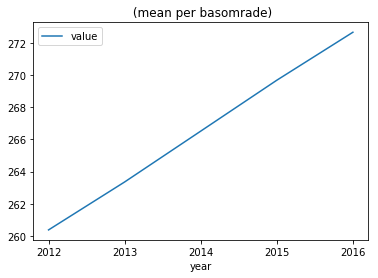

In [29]:
out = df[['basomrade', 'year', 'antal_hushall_med_barn']].copy().rename(columns={'antal_hushall_med_barn': 'value'})
out = appendNewDatapoints(concept, out, new=True)
plotcombined(out)